In [2]:
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import torch
import numpy as np
import math
LABELS = ['AdaSmooth','SGD']# 'RMSProp', 'AdaBound','Adam','AMSGrad','AdaMod'

params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
         }
         #'axes.legend.fontsize':'medium',}
#plt.rcParams.keys()
plt.rcParams.update(params)

In [22]:
def get_data(names):
    folder_path = './curve'
    paths = [os.path.join(folder_path, name) for name in names]
    return {name: torch.load(fp) for name, fp in zip(names, paths)}

def plot(names, curve_type='train', labels = None, ylim=(50,120)):
    plt.figure()
    plt.ylim(ylim)# if curve_type == 'train' else 96)
    curve_data = get_data(names)
    for i, label in zip(curve_data.keys(),labels):
        acc = np.array(curve_data[i]['{}_loss'.format(curve_type.lower())])
        
        if label == 'AdaSmooth':
            plt.plot(acc, '-' ,label = label)
            # plt.plot(acc, '*' ,label = label)
            # print(curve_data.keys())
        else:
            plt.plot(acc, '--',label=label)
    
    plt.grid()
    #plt.legend(fontsize=14, loc='lower left')
    #plt.legend(fontsize=14, loc='upper right')
    plt.legend(fontsize=12, loc='upper right')
    plt.title('{} set perplexity ~ training epoch'.format(curve_type),fontsize=12,)
    plt.xlabel('Training Epoch',fontsize=12,)
    plt.ylabel('Perplexity',fontsize=12,)    

# 1-layer LSTM

<IPython.core.display.Javascript object>


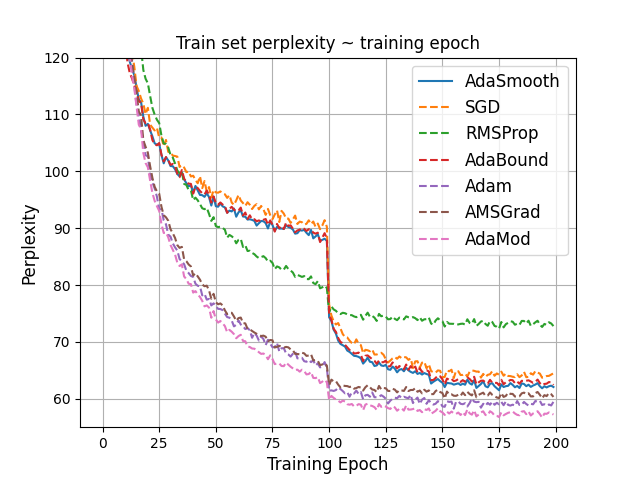

<IPython.core.display.Javascript object>


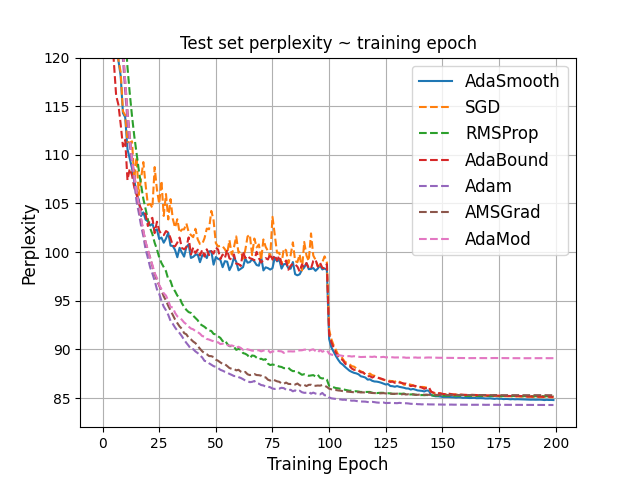

In [23]:
names = [ 'PTB.pt-niter-200-optimizer-adasmooth-nlayers1-lr0.001-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',         
          'PTB.pt-niter-200-optimizer-sgd-nlayers1-lr30.0-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-rmsprop-nlayers1-lr0.001-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adabound-nlayers1-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adam-nlayers1-lr0.001-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-amsgrad-nlayers1-lr0.001-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adamod-nlayers1-lr0.001-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',         
        ]
labels = ['AdaSmooth',
          'SGD',
          'RMSProp',
          'AdaBound',
          'Adam',
          'AMSGrad',
          'AdaMod'
        ]
plot(names, 'Train', ylim=(55,120),labels = labels)
plt.savefig('./image/Train_lstm_1layer.png', dpi=600)
plt.savefig('./image/Train_lstm_1layer.svg',format="svg") 
plot(names, 'Test', ylim=(82,120), labels = labels)
plt.savefig('./image/Test_lstm_1layer.png', dpi=600)
plt.savefig('./image/Test_lstm_1layer.svg',format="svg") 

# 2-layer LSTM

<IPython.core.display.Javascript object>


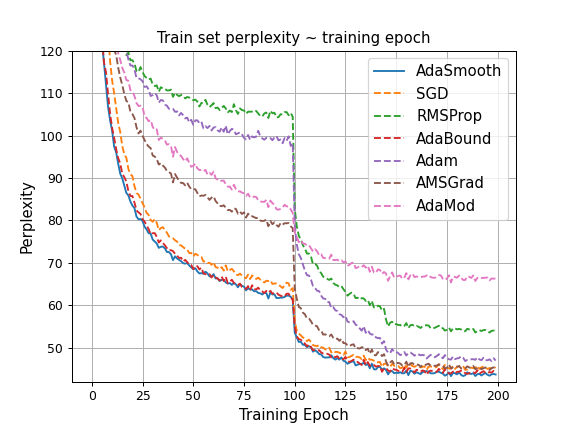

<IPython.core.display.Javascript object>


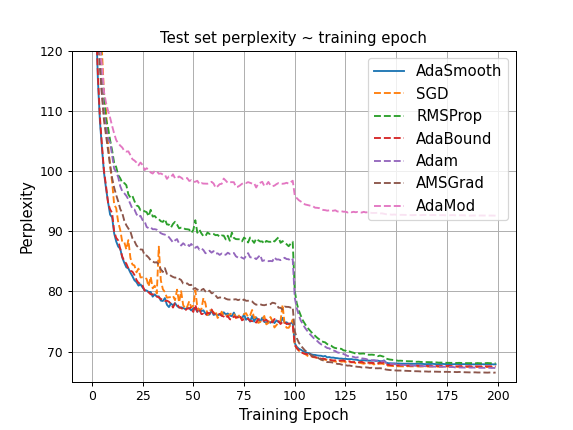

In [24]:
names = [ 'PTB.pt-niter-200-optimizer-adasmooth-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',         
          'PTB.pt-niter-200-optimizer-sgd-nlayers2-lr30.0-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-rmsprop-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adabound-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adam-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-amsgrad-nlayers2-lr0.01-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adamod-nlayers2-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',         
        ]
labels = ['AdaSmooth',
          'SGD',
          'RMSProp',
          'AdaBound',
          'Adam',
          'AMSGrad',
          'AdaMod'
        ]
plot(names, 'Train',ylim=(42,120), labels = labels)
plt.savefig('./image/Train_lstm_2layer.png', dpi=600)
plt.savefig('./image/Train_lstm_2layer.svg',format="svg") 
plot(names, 'Test', ylim=(65,120), labels = labels)
plt.savefig('./image/Test_lstm_2layer.png', dpi=600)
plt.savefig('./image/Test_lstm_2layer.svg',format="svg") 

# 3-layer LSTM

<IPython.core.display.Javascript object>


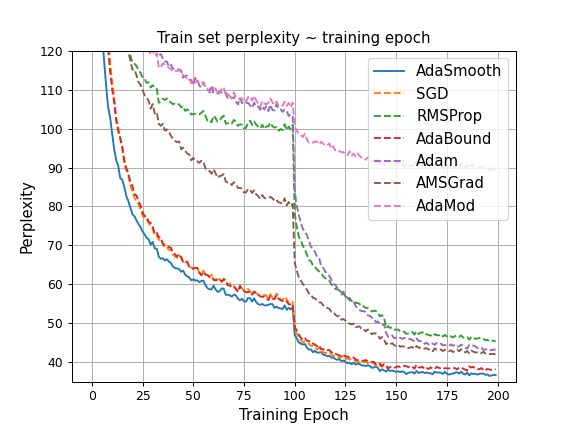

<IPython.core.display.Javascript object>


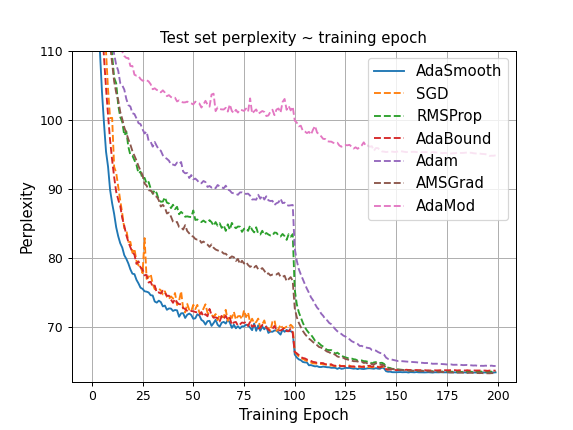

In [25]:
names = [ 'PTB.pt-niter-200-optimizer-adasmooth-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',         
          'PTB.pt-niter-200-optimizer-sgd-nlayers3-lr30.0-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-rmsprop-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adabound-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adam-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-amsgrad-nlayers3-lr0.01-clip-0.25-eps1e-12-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',
          'PTB.pt-niter-200-optimizer-adamod-nlayers3-lr0.01-clip-0.25-eps1e-08-epsqrt1e-08-betas-0.9-0.999-run0-wdecay1.2e-06-when-[100, 145]',         
        ]
labels = ['AdaSmooth',
          'SGD',
          'RMSProp',
          'AdaBound',
          'Adam',
          'AMSGrad',
          'AdaMod'
        ]

plot(names, 'Train',ylim=(35,120), labels = labels)
plt.savefig('./image/Train_lstm_3layer.png', dpi=600)
plt.savefig('./image/Train_lstm_3layer.svg',format="svg") 
plot(names, 'Test', ylim=(62,110), labels = labels)
plt.savefig('./image/Test_lstm_3layer.png', dpi=600)
plt.savefig('./image/Test_lstm_3layer.svg',format="svg") 